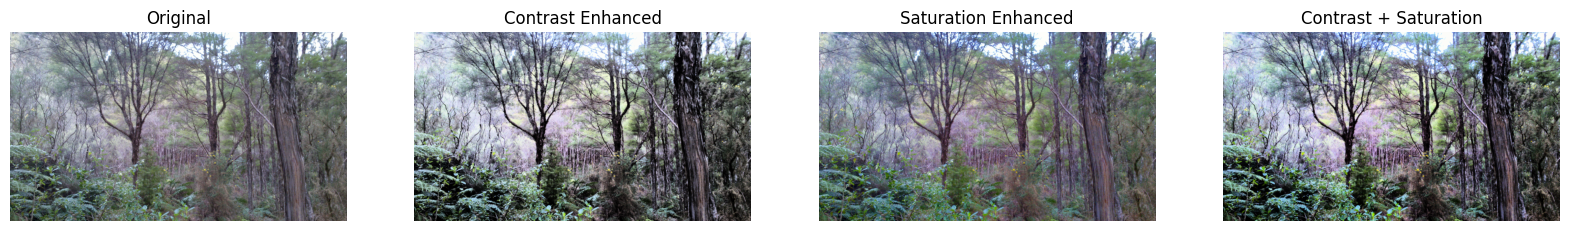

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# -------------------------
# Load image from your PC
# -------------------------
# Change filename/path to match your saved image
image_path = "Typical_New_Zealand_scenic_walk_view.jpg"
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Convert from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# -------------------------
# 1. Contrast Enhancement - Histogram Equalization on V channel
# -------------------------
hsv_contrast = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_contrast)
v_eq = cv2.equalizeHist(v)
hsv_eq = cv2.merge([h, s, v_eq])
contrast_enhanced = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)

# -------------------------
# 2. Saturation Enhancement
# -------------------------
hsv_sat = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
h2, s2, v2 = cv2.split(hsv_sat)
s2 = np.clip(s2.astype(np.float32) * 1.5, 0, 255).astype(np.uint8)
hsv_sat_enhanced = cv2.merge([h2, s2, v2])
saturation_enhanced = cv2.cvtColor(hsv_sat_enhanced, cv2.COLOR_HSV2RGB)

# -------------------------
# 3. Combined Enhancement (Contrast + Saturation)
# -------------------------
hsv_combined = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
h3, s3, v3 = cv2.split(hsv_combined)

# Equalize V channel
v3_eq = cv2.equalizeHist(v3)

# Boost Saturation
s3_boosted = np.clip(s3.astype(np.float32) * 1.5, 0, 255).astype(np.uint8)

# Merge back and convert to RGB
hsv_combined_enhanced = cv2.merge([h3, s3_boosted, v3_eq])
combined_enhanced = cv2.cvtColor(hsv_combined_enhanced, cv2.COLOR_HSV2RGB)

# -------------------------
# Show all results
# -------------------------
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(contrast_enhanced)
plt.title("Contrast Enhanced")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(saturation_enhanced)
plt.title("Saturation Enhanced")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(combined_enhanced)
plt.title("Contrast + Saturation")
plt.axis('off')

plt.show()
